In [1]:
import sys
sys.path.insert(0, 'C:/Users/lukas/OneDrive - Johannes Kepler Universität Linz/Projekte/DLinear/data')
import data__, experimentSetup, datafactory, data_utils
from importlib import reload
reload(data__)
reload(main_)
reload(datafactory)
reload(data_utils)
from datafactory import DataSet
from data__ import Transform
from experimentSetup import Model
import matplotlib.pyplot as plt

In [16]:
#target = "power_consumption_kwh"
target = "thermal_consumption_kwh"

experiment = {}

dset = DataSet(start_date="2022-01-01", target=target, scale_target=False, scale_variables=False, time_features=False, dynamic_price=False, demand_price=0.5, feedin_price=0.5).pipeline()
#dset = dset[["date","i_m1sum",target]]

dset = dset[["date",target]]


t = Transform(dataset=dset, resample="h", target=target, scale_X=True)
data= t.transform()
data

0.07637132957990407 1.272


C:\Users/lukas/OneDrive - Johannes Kepler Universität Linz/Projekte/DLinear/data\datafactory.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.thermal_consumption[idx_temp] = abs(m_diff[m_diff < 0])   # only positive values
C:\Users/lukas/OneDrive - Johannes Kepler Universität Linz/Projekte/DLinear/data\datafactory.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.thermal_consumption[idx_temp] = abs(m_diff[m_diff < 0])   # only positive values


,val_last_day,val_last_week,mean_24h,month,hour,weekday,day_continuous,thermal_consumption_kwh
0,0.000389,-0.000135,0.002338,1,0,5,-1.630831,0.445731
1,0.000389,-0.000135,0.002338,1,1,5,-1.630831,0.174417
2,0.000389,-0.000135,0.002338,1,2,5,-1.630831,0.135657
3,0.000389,-0.000135,0.002338,1,3,5,-1.630831,0.232556
4,0.000389,-0.000135,0.002338,1,4,5,-1.630831,0.465111
...,...,...,...,...,...,...,...,...
5521,-0.141921,-0.198194,0.339395,8,1,4,0.438983,0.116278
5522,-0.170025,-0.142116,0.312142,8,2,4,0.438983,0.174417
5523,-0.141921,-0.226233,0.312142,8,3,4,0.438983,0.116278
5524,-0.170025,-0.226233,0.284889,8,4,4,0.438983,0.096898


In [17]:
from itertools import combinations


features = list(data.columns)
del features[-1]

print(features)

feature_combinations = []
for i in range(len(features)):
    oc = combinations(features, i + 1)
    for c in oc:
        l = list(c)
        l.append(target)
        feature_combinations.append(l)

feature_combinations

['val_last_day', 'val_last_week', 'mean_24h', 'month', 'hour', 'weekday', 'day_continuous']


[['val_last_day', 'thermal_consumption_kwh'],
 ['val_last_week', 'thermal_consumption_kwh'],
 ['mean_24h', 'thermal_consumption_kwh'],
 ['month', 'thermal_consumption_kwh'],
 ['hour', 'thermal_consumption_kwh'],
 ['weekday', 'thermal_consumption_kwh'],
 ['day_continuous', 'thermal_consumption_kwh'],
 ['val_last_day', 'val_last_week', 'thermal_consumption_kwh'],
 ['val_last_day', 'mean_24h', 'thermal_consumption_kwh'],
 ['val_last_day', 'month', 'thermal_consumption_kwh'],
 ['val_last_day', 'hour', 'thermal_consumption_kwh'],
 ['val_last_day', 'weekday', 'thermal_consumption_kwh'],
 ['val_last_day', 'day_continuous', 'thermal_consumption_kwh'],
 ['val_last_week', 'mean_24h', 'thermal_consumption_kwh'],
 ['val_last_week', 'month', 'thermal_consumption_kwh'],
 ['val_last_week', 'hour', 'thermal_consumption_kwh'],
 ['val_last_week', 'weekday', 'thermal_consumption_kwh'],
 ['val_last_week', 'day_continuous', 'thermal_consumption_kwh'],
 ['mean_24h', 'month', 'thermal_consumption_kwh'],
 ['m

In [9]:
model = Model(model="svr", dataset=data, encoding="onehot", scale=True, target=target, test_size=0.05, epochs=200)

dataset shape (5526, 48)


c:\Users\lukas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


scaled MAE:  0.2932795088390125
y_pred mean and std:
0.2206095850556609 0.23764942023189775


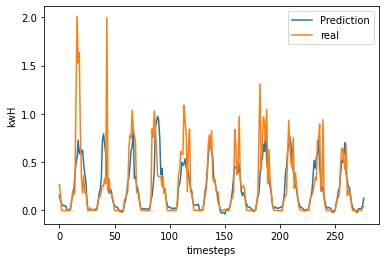

{'mae': 0.2932795088390125,
 'mse': 0.3382499988617198,
 'mape': 0.8842215357087188,
 'r2': 0.5147565817629328}

In [10]:
model.results(plot=True)

In [9]:
from sklearn.model_selection import ParameterGrid
import pandas as pd

# params_grid = {
#   "n_hidden1": [500],
#   "n_hidden2": [50],
#   "encoding": ["cyclical", "onehot", None],
#   "activation1": ["sigmoid",  "selu", "relu"],
#   "activation2": ["sigmoid",  "selu" , "relu"],
#   "lr": [0.001, 0.0001]
# }

params_grid = {
  "n_hidden1": [500],
  "n_hidden2": [50],
  "features": feature_combinations,
  "encoding": ["onehot"],
  "activation1": ["relu"],
  "activation2": ["relu"],
  "lr": [0.001]
}


grid = ParameterGrid(params_grid) 

In [ ]:
print(len(grid))
res = []
for p in grid:
    print(p)
    model = Model(model="nn", dataset=data[p["features"]], encoding=p["encoding"], scale=True, target=target, test_size=0.05, epochs=100, verbose=0, nn_params=p )
    metrics = model.results(plot=False)
    p.update(metrics)
    res.append(p)

df = pd.DataFrame(res)
experiment.update({"df_nn": df})
df.sort_values(by='mse', ascending=True)

In [97]:
df.sort_values(by='mse', ascending=True)["features"].to_list()

[['val_last_week',
  'month',
  'hour',
  'weekday',
  'day_continuous',
  'power_consumption_kwh'],
 ['hour', 'weekday', 'power_consumption_kwh'],
 ['month', 'hour', 'weekday', 'day_continuous', 'power_consumption_kwh'],
 ['val_last_week',
  'mean_24h',
  'hour',
  'weekday',
  'day_continuous',
  'power_consumption_kwh'],
 ['month', 'hour', 'day_continuous', 'power_consumption_kwh'],
 ['hour', 'weekday', 'day_continuous', 'power_consumption_kwh'],
 ['val_last_week',
  'hour',
  'weekday',
  'day_continuous',
  'power_consumption_kwh'],
 ['mean_24h', 'hour', 'weekday', 'power_consumption_kwh'],
 ['val_last_week', 'hour', 'weekday', 'power_consumption_kwh'],
 ['val_last_week',
  'mean_24h',
  'month',
  'hour',
  'weekday',
  'power_consumption_kwh'],
 ['val_last_week', 'mean_24h', 'hour', 'weekday', 'power_consumption_kwh'],
 ['val_last_week', 'month', 'hour', 'day_continuous', 'power_consumption_kwh'],
 ['val_last_week', 'month', 'hour', 'weekday', 'power_consumption_kwh'],
 ['mean_2

In [11]:
from sklearn.model_selection import ParameterGrid
import pandas as pd

params_grid = {
  "model": ["SVR"],
  # "kernel": ["rbf", "sigmoid", "poly"],
  # "degree": [3],  # only valid for "poly" kernel
  # "C": [1, 0.8, 0.9],   # default = 1
  # "epsilon": [0.1, 0.03], # default = 0.1
  "features": feature_combinations,
  "kernel": ["rbf"],
  "degree": [3],  # only valid for "poly" kernel
  "C": [0.8],   # default = 1
  "epsilon": [0.3], # default = 0.1
  "encoding": ["cyclical", "onehot", None]
}

grid = ParameterGrid(params_grid) 

In [ ]:
print(len(grid))
res = []
for p in grid:
    print(p)
    model = Model(model="svr", dataset=data[p["features"]], encoding=p["encoding"], scale=True, target=target, test_size=0.05, epochs=100, verbose=0, svr_params=p )
    metrics = model.results(plot=False)
    p.update(metrics)
    res.append(p)

df = pd.DataFrame(res)
experiment.update({"df_svr": df})
df.sort_values(by='mse', ascending=True)

In [13]:
# df.sort_values(by='mae', ascending=True)[:5].features.to_list()
df.sort_values(by='mae', ascending=True)

,C,degree,encoding,epsilon,features,kernel,model,mae,mse,mape,r2
227,0.8,3,onehot,0.3,"[val_last_day, val_last_week, mean_24h, month,...",rbf,SVR,0.193355,0.174815,0.994132,0.070826
187,0.8,3,onehot,0.3,"[month, hour, day_continuous, thermal_consumpt...",rbf,SVR,0.195073,0.180632,0.887713,0.039909
202,0.8,3,onehot,0.3,"[val_last_day, mean_24h, month, day_continuous...",rbf,SVR,0.196033,0.175486,1.025999,0.067262
166,0.8,3,onehot,0.3,"[val_last_day, month, day_continuous, thermal_...",rbf,SVR,0.196234,0.178489,0.896601,0.051298
221,0.8,3,onehot,0.3,"[mean_24h, month, hour, day_continuous, therma...",rbf,SVR,0.199203,0.176321,0.968367,0.062823
...,...,...,...,...,...,...,...,...,...,...,...
211,0.8,3,onehot,0.3,"[val_last_week, mean_24h, month, weekday, ther...",rbf,SVR,0.260733,0.192506,1.248788,-0.023202
180,0.8,3,onehot,0.3,"[mean_24h, month, hour, thermal_consumption_kwh]",rbf,SVR,0.261376,0.184812,1.769883,0.017695
235,0.8,3,onehot,0.3,"[val_last_day, mean_24h, month, hour, weekday,...",rbf,SVR,0.262577,0.184209,1.924147,0.020900
186,0.8,3,onehot,0.3,"[month, hour, weekday, thermal_consumption_kwh]",rbf,SVR,0.263061,0.186839,1.866511,0.006916


In [5]:
params_grid = {
  "n_epochs": [20], 
  "learning_rate": [0.001], 
  "batch_size": [64], 
  "hidden_size": [50], 
  "num_layers": [1], 
  "lookback_len": [100], 
  "pred_len": [12,24,48],
  "encoding": ["cyclical", "onehot", None]
}

grid = ParameterGrid(params_grid) 

In [6]:
%load_ext autoreload
%autoreload 2

In [7]:

import data__, main_, datafactory, data_utils
from importlib import reload
reload(data__)
reload(main_)
reload(datafactory)
reload(data_utils)
from datafactory import DataSet
from data__ import Transform
from main_ import Model


print(len(grid))
res = []
for p in grid:
    print(p)
    model = Model(model="lstm", dataset=data, encoding=p["encoding"], scale=True, target=target, test_size=0.05, epochs=200, lstm_params=p)

    metrics = model.results()
    p.update(metrics)
    res.append(p)

df = pd.DataFrame(res)
experiment.update({"df_lstm": df})
df.sort_values(by='mae', ascending=True)


9
{'batch_size': 64, 'encoding': 'cyclical', 'hidden_size': 50, 'learning_rate': 0.001, 'lookback_len': 100, 'n_epochs': 20, 'num_layers': 1, 'pred_len': 12}
(5249, 11) (277, 1)
{'batch_size': 64, 'encoding': 'cyclical', 'hidden_size': 50, 'learning_rate': 0.001, 'lookback_len': 100, 'n_epochs': 20, 'num_layers': 1, 'pred_len': 12, 'input_size': 11}
### [[ 3.88913979e-04 -1.34607610e-04  2.33802279e-03 ... -8.66025404e-01
   5.00000000e-01  4.45731481e-01]
 [ 3.88913979e-04 -1.34607610e-04  2.33802279e-03 ... -8.66025404e-01
   5.00000000e-01  1.74416667e-01]
 [ 3.88913979e-04 -1.34607610e-04  2.33802279e-03 ... -8.66025404e-01
   5.00000000e-01  1.35657407e-01]
 ...
 [-4.22959562e-01 -8.60378202e-02 -8.73352752e-01 ... -2.44929360e-16
   1.00000000e+00  3.87592593e-01]
 [-4.22959562e-01  5.41574405e-02 -7.37088979e-01 ... -2.44929360e-16
   1.00000000e+00  4.06972222e-01]
 [-4.22959562e-01 -5.79987681e-02 -5.94012018e-01 ... -2.44929360e-16
   1.00000000e+00  2.90694444e-01]] [[ 0.222

In [18]:
from sklearn.model_selection import ParameterGrid
import pandas as pd

params_grid = {
  "model": ["LinearRegression"],
  "features": feature_combinations,
  "encoding": ["onehot","cyclical", None]
}

grid = ParameterGrid(params_grid) 

In [19]:
print(len(grid))
res = []
for p in grid:
    print(p, target)
    model = Model(model="linear_regression", dataset=data[p["features"]], encoding=p["encoding"], scale=True, target=target, test_size=0.05, epochs=200, lstm_params=p)
    
    metrics = model.results(plot=False)
    p.update(metrics)
    res.append(p)

df = pd.DataFrame(res)
experiment.update({"df_linearRegression": df})
df.sort_values(by='mse', ascending=True)

381
{'encoding': 'onehot', 'features': ['val_last_day', 'thermal_consumption_kwh'], 'model': 'LinearRegression'} thermal_consumption_kwh
dataset shape (5526, 2)
[[ 0.22246483]
 [-0.16997336]
 [-0.22603596]
 ...
 [ 0.13837094]
 [ 0.16640224]
 [-0.00178556]] [[ 3.88913979e-04]
 [ 3.88913979e-04]
 [ 3.88913979e-04]
 ...
 [-4.22959562e-01]
 [-4.22959562e-01]
 [-4.22959562e-01]]
scaled MAE:  0.2480205377804628
y_pred mean and std:
0.28663799990169264 0.016062660281841053
{'encoding': 'onehot', 'features': ['val_last_week', 'thermal_consumption_kwh'], 'model': 'LinearRegression'} thermal_consumption_kwh
dataset shape (5526, 2)
[[ 0.22246483]
 [-0.16997336]
 [-0.22603596]
 ...
 [ 0.13837094]
 [ 0.16640224]
 [-0.00178556]] [[-0.00013461]
 [-0.00013461]
 [-0.00013461]
 ...
 [-0.08603782]
 [ 0.05415744]
 [-0.05799877]]
scaled MAE:  0.24909760345025886
y_pred mean and std:
0.2876793781187894 0.041059498054477665
{'encoding': 'onehot', 'features': ['mean_24h', 'thermal_consumption_kwh'], 'model': 

,encoding,features,model,mae,mse,mape,r2
206,cyclical,"[val_last_day, month, hour, weekday, thermal_c...",LinearRegression,0.226587,0.167839,2.035742,0.107908
239,cyclical,"[val_last_day, month, hour, weekday, day_conti...",LinearRegression,0.227008,0.167985,2.046099,0.107132
164,cyclical,"[val_last_day, month, hour, thermal_consumptio...",LinearRegression,0.227058,0.168176,2.040303,0.106118
207,cyclical,"[val_last_day, month, hour, day_continuous, th...",LinearRegression,0.227427,0.168330,2.050062,0.105297
186,cyclical,"[month, hour, weekday, thermal_consumption_kwh]",LinearRegression,0.229485,0.168509,2.088558,0.104346
...,...,...,...,...,...,...,...
365,None,"[val_last_day, mean_24h, hour, weekday, day_co...",LinearRegression,0.299249,0.207856,1.820766,-0.104790
273,None,"[mean_24h, hour, thermal_consumption_kwh]",LinearRegression,0.308999,0.210022,1.802489,-0.116303
311,None,"[mean_24h, hour, day_continuous, thermal_consu...",LinearRegression,0.310427,0.210823,1.825067,-0.120558
310,None,"[mean_24h, hour, weekday, thermal_consumption_...",LinearRegression,0.303460,0.211608,1.818552,-0.124733


<h1>Save Experiments in Benchmark Folder<h1>

In [8]:
print(target)
for i,e in enumerate(experiment.items()):
    label = e[0]
    df = e[1]
    if target == "power_consumption_kwh":
        df.to_csv("benchmarks/power/" + label +  ".csv")
    if target == "thermal_consumption_kwh":
        df.to_csv("benchmarks/thermal/" + label +  ".csv")

thermal_consumption_kwh
